In [126]:
import pandas as pd
import sqlite3
import numpy as np

pd.set_option('display.max_columns', 500)

## Get most complete data sources and remove duplicates

In [127]:
conn_1 = sqlite3.connect('../data/raw/batch_1.db')
conn_2 = sqlite3.connect('../data/raw/batch_2.db')
conn_test = sqlite3.connect('../data/raw/test.db')
fuel = pd.read_parquet('../data/raw/fuel.parquet')

In [128]:
vols_1 = pd.read_sql_query("SELECT * FROM vols", conn_1)
vols_2 = pd.read_sql_query("SELECT * FROM vols", conn_2)

In [129]:
vols = pd.concat([vols_1, vols_2])

In [130]:
vols.head()

,IDENTIFIANT,VOL,CODE AVION,AEROPORT DEPART,AEROPORT ARRIVEE,DEPART PROGRAMME,HEURE DE DEPART,RETART DE DEPART,TEMPS DE DEPLACEMENT A TERRE AU DECOLLAGE,DECOLLAGE,TEMPS PROGRAMME,TEMPS PASSE,TEMPS DE VOL,DISTANCE,ATTERRISSAGE,TEMPS DE DEPLACEMENT A TERRE A L'ATTERRISSAGE,ARRIVEE PROGRAMMEE,HEURE D'ARRIVEE,RETARD A L'ARRIVEE,DETOURNEMENT,ANNULATION,RAISON D'ANNULATION,RETARD SYSTEM,RETARD SECURITE,RETARD COMPAGNIE,RETARD AVION,RETARD METEO,COMPAGNIE AERIENNE,NOMBRE DE PASSAGERS,DATE,NIVEAU DE SECURITE
0,1259209,4661,a02782cd75,CEB,AAL,1707,1658.0,-9.0,20.0,1718.0,67.0,71.0,45.0,232,1803.0,6.0,1814,1809.0,-5.0,0,0,None,NaN,NaN,NaN,NaN,NaN,MAF,379,15/8/2018,10
1,4886177,5026,707f6ea54f,GOI,LTK,600,553.0,-7.0,11.0,604.0,130.0,119.0,91.0,738,835.0,17.0,910,852.0,-18.0,0,0,None,NaN,NaN,NaN,NaN,NaN,I6F,9,2/11/2016,10
2,183332,2021,b116987956,DSS,JNB,1749,1747.0,-2.0,9.0,1756.0,248.0,228.0,215.0,1671,1831.0,4.0,1857,1835.0,-22.0,0,0,None,NaN,NaN,NaN,NaN,NaN,NVPPA,2491,9/6/2017,10
3,937517,1320,a4b8db63f5,AGP,GOA,2301,2322.0,21.0,19.0,2341.0,65.0,89.0,59.0,214,40.0,11.0,6,51.0,45.0,0,0,None,24.0,0.0,0.0,6.0,15.0,NVPPA,1241,26/5/2018,10
4,2157498,508,34604053c0,BRU,BOD,612,603.0,-9.0,13.0,616.0,302.0,259.0,238.0,2288,1314.0,8.0,1414,1322.0,-52.0,0,0,None,NaN,NaN,NaN,NaN,NaN,THA,78,10/11/2018,10


In [131]:
aeroports_2 = pd.read_sql_query("SELECT * FROM aeroports", conn_2)

In [132]:
aeroports = aeroports_2.drop_duplicates(subset=['CODE IATA'], keep='last')

In [133]:
aeroports.head()

,CODE IATA,NOM,LIEU,PAYS,LONGITUDE,LATITUDE,HAUTEUR,PRIX RETARD PREMIERE 20 MINUTES,PRIS RETARD POUR CHAQUE MINUTE APRES 10 MINUTES
0,MCT,Muscat International Airport,Muscat,OM,58.284400939941406,23.593299865722656,48.0,53,3
1,SOU,Southampton Airport,Southampton,GB,-1.3567999601364136,50.95029830932617,44.0,24,5
2,PNH,Phnom Penh International Airport,Phnom Penh,KH,104.84400177001953,11.546600341796875,40.0,33,3
3,BLR,Kempegowda International Airport,Bangalore,IN,77.706299,13.1979,3000.0,70,9
4,FFD,RAF Fairford,Fairford,GB,-1.7900300025900002,51.6822013855,286.0,65,3


In [134]:
compagnies = pd.read_sql_query("SELECT * FROM compagnies", conn_2)

In [135]:
compagnies.head()

,COMPAGNIE,CODE,NOMBRE D EMPLOYES,CHIFFRE D AFFAIRE
0,Try Hard Airlines,THA,12909,2310000000
1,Corporate Overlord Airways,COA,130595,40579000000
2,Neverland Airlines,NA,18567,7651000000
3,Always A Problem Flights,AAPF,92000,51000000000
4,Overpriced Air,OA,12200,6649000000


In [136]:
fuel = pd.read_parquet('../data/raw/fuel.parquet')

In [137]:
fuel.head()

,DATE,PRIX DU BARIL
0,04/01/16,57.780
1,05/01/16,56.365
2,06/01/16,55.070
3,07/01/16,53.690
4,08/01/16,53.230


## Prepare data for aggregation

In [301]:
from src.data_preparation import rename_dataframe_columns, prepare_fuel_timeseries, merge_flights_with_airlines, 
merge_flights_with_departures_airports, merge_flights_with_arrivals_airports, merge_flights_with_fuel

SyntaxError: trailing comma not allowed without surrounding parentheses (<ipython-input-301-9c90b2a1d32f>, line 1)

In [145]:
vols_new_col_names = rename_dataframe_columns(vols)
compagnies_new_col_names = rename_dataframe_columns(compagnies, 'compagnies_')
fuel_new_col_names = rename_dataframe_columns(fuel, 'fuel_')
depart_aeroports = rename_dataframe_columns(aeroports, 'depart_')
arrivee_aeroports = rename_dataframe_columns(aeroports, 'arrivee_')

In [188]:
fuel_prepared = prepare_fuel_timeseries(fuel_new_col_names)

In [189]:
vols_new_col_names['date'] = pd.to_datetime(vols_new_col_names['date'], format='%d/%m/%Y')

## Aggregate data

In [191]:
flights_with_airlines = merge_flights_with_airlines(vols_new_col_names, compagnies_new_col_names)

In [193]:
flights_with_departures = merge_flights_with_departures_airports(flights_with_airlines, depart_aeroports)

In [195]:
flights_with_arrivals = merge_flights_with_arrivals_airports(flights_with_departures, arrivee_aeroports)

In [210]:
flights_agg = merge_flights_with_fuel(flights_with_arrivals, fuel_prepared)

In [211]:
flights_agg.head()

,identifiant,vol,code_avion,depart_programme,heure_de_depart,retart_de_depart,temps_de_deplacement_a_terre_au_decollage,decollage,temps_programme,temps_passe,temps_de_vol,distance,atterrissage,temps_de_deplacement_a_terre_a_l'atterrissage,arrivee_programmee,heure_d'arrivee,retard_a_l'arrivee,detournement,annulation,raison_d'annulation,retard_system,retard_securite,retard_compagnie,retard_avion,retard_meteo,nombre_de_passagers,date,niveau_de_securite,compagnies_compagnie,compagnies_code,compagnies_nombre_d_employes,compagnies_chiffre_d_affaire,depart_code_iata,depart_nom,depart_lieu,depart_pays,depart_longitude,depart_latitude,depart_hauteur,depart_prix_retard_premiere_20_minutes,depart_pris_retard_pour_chaque_minute_apres_10_minutes,arrivee_code_iata,arrivee_nom,arrivee_lieu,arrivee_pays,arrivee_longitude,arrivee_latitude,arrivee_hauteur,arrivee_prix_retard_premiere_20_minutes,arrivee_pris_retard_pour_chaque_minute_apres_10_minutes,fuel_prix_du_baril
0,1259209,4661,a02782cd75,1707,1658.0,-9.0,20.0,1718.0,67.0,71.0,45.0,232,1803.0,6.0,1814,1809.0,-5.0,0,0,None,NaN,NaN,NaN,NaN,NaN,379,2018-08-15,10,Morally Ambiguious Fligthts,MAF,15150,6391000000,CEB,Mactan Cebu International Airport,Lapu-Lapu City,PH,123.97899627686,10.307499885559,31.0,38,9,AAL,Aalborg Airport,Aalborg,DK,9.84924316406,57.0927589138,10.0,17,9,85.7600
1,4886177,5026,707f6ea54f,600,553.0,-7.0,11.0,604.0,130.0,119.0,91.0,738,835.0,17.0,910,852.0,-18.0,0,0,None,NaN,NaN,NaN,NaN,NaN,9,2016-11-02,10,IE 6.0 Flights,I6F,17569,2660000000,GOI,Dabolim Airport,Vasco da Gama,IN,73.8313980103,15.3808002472,150.0,95,6,LTK,Bassel Al-Assad International Airport,Latakia,SY,35.948699951171875,35.401100158691406,157.0,90,7,46.7400
2,183332,2021,b116987956,1749,1747.0,-2.0,9.0,1756.0,248.0,228.0,215.0,1671,1831.0,4.0,1857,1835.0,-22.0,0,0,None,NaN,NaN,NaN,NaN,NaN,2491,2017-06-09,10,Ne Va Pas Partout Airlines,NVPPA,12000,6235000000,DSS,Blaise Diagne International Airport,Dakar,SN,-17.073333,14.67,290.0,57,7,JNB,OR Tambo International Airport,Johannesburg,ZA,28.246,-26.1392,5558.0,94,1,68.8650
3,937517,1320,a4b8db63f5,2301,2322.0,21.0,19.0,2341.0,65.0,89.0,59.0,214,40.0,11.0,6,51.0,45.0,0,0,None,24.0,0.0,0.0,6.0,15.0,1241,2018-05-26,10,Ne Va Pas Partout Airlines,NVPPA,12000,6235000000,AGP,MÃ¡laga Airport,MÃ¡laga,ES,-4.499110221862793,36.67490005493164,53.0,56,9,GOA,Genoa Cristoforo Colombo Airport,Genova,IT,8.8375,44.4133,13.0,65,3,89.1875
4,2157498,508,34604053c0,612,603.0,-9.0,13.0,616.0,302.0,259.0,238.0,2288,1314.0,8.0,1414,1322.0,-52.0,0,0,None,NaN,NaN,NaN,NaN,NaN,78,2018-11-10,10,Try Hard Airlines,THA,12909,2310000000,BRU,Brussels Airport,Brussels,BE,4.48443984985,50.901401519800004,184.0,63,8,BOD,Bordeaux-MÃ©rignac Airport,Bordeaux/MÃ©rignac,FR,-0.715556025505,44.828300476100004,162.0,13,4,91.7300


## Features engineering

In [215]:
POSSIBLE_LEAK_COLUMNS = ['heure_de_depart', 'retart_de_depart', 'temps_de_deplacement_a_terre_au_decollage', 
                         'decollage', 'temps_de_vol', 'temps_passe', 'atterrissage', 
                         "temps_de_deplacement_a_terre_a_l'atterrissage", "heure_d'arrivee",  
                         'detournement', 'annulation', "raison_d'annulation", 'retard_system', 'retard_securite', 
                         'retard_compagnie', 'retard_avion', 'retard_avion', 'retard_meteo']

DUPLICATED_DATA = ['compagnies_compagnie', 'depart_nom', 'arrivee_nom']

OTHER_COLUMNS_TO_DROP = ['depart_prix_retard_premiere_20_minutes', 
                         'depart_pris_retard_pour_chaque_minute_apres_10_minutes',
                         'arrivee_prix_retard_premiere_20_minutes',
                         'arrivee_pris_retard_pour_chaque_minute_apres_10_minutes',
                         'identifiant']

COLUMNS_TO_DROP = POSSIBLE_LEAK_COLUMNS + DUPLICATED_DATA + OTHER_COLUMNS_TO_DROP

In [216]:
flights_removed_col = flights_agg.drop(columns=COLUMNS_TO_DROP)

In [224]:
from src.feature_engineering import create_columns_from_date, convert_latitude_longitude_to_float, 
create_hour_column_from_departure_time, 

In [225]:
flights_new_col = create_columns_from_date(flights_removed_col)

In [227]:
flights_converted_lat = convert_latitude_longitude_to_float(flights_new_col)

In [237]:
flights_dep_hour = create_hour_column_from_departure_time(flights_converted_lat)

In [241]:
flights_dep_hour.head()

,vol,code_avion,depart_programme,temps_programme,distance,arrivee_programmee,retard_a_l'arrivee,nombre_de_passagers,niveau_de_securite,compagnies_code,compagnies_nombre_d_employes,compagnies_chiffre_d_affaire,depart_code_iata,depart_lieu,depart_pays,depart_longitude,depart_latitude,depart_hauteur,arrivee_code_iata,arrivee_lieu,arrivee_pays,arrivee_longitude,arrivee_latitude,arrivee_hauteur,fuel_prix_du_baril,day,month,year,depart_hour
0,4661,a02782cd75,1707,67.0,232,1814,-5.0,379,10,MAF,15150,6391000000,CEB,Lapu-Lapu City,PH,123.978996,10.307500,31.0,AAL,Aalborg,DK,9.849243,57.092759,10.0,85.7600,15,8,2018,17
1,5026,707f6ea54f,600,130.0,738,910,-18.0,9,10,I6F,17569,2660000000,GOI,Vasco da Gama,IN,73.831398,15.380800,150.0,LTK,Latakia,SY,35.948700,35.401100,157.0,46.7400,2,11,2016,6
2,2021,b116987956,1749,248.0,1671,1857,-22.0,2491,10,NVPPA,12000,6235000000,DSS,Dakar,SN,-17.073333,14.670000,290.0,JNB,Johannesburg,ZA,28.246000,-26.139200,5558.0,68.8650,9,6,2017,17
3,1320,a4b8db63f5,2301,65.0,214,6,45.0,1241,10,NVPPA,12000,6235000000,AGP,MÃ¡laga,ES,-4.499110,36.674900,53.0,GOA,Genova,IT,8.837500,44.413300,13.0,89.1875,26,5,2018,23
4,508,34604053c0,612,302.0,2288,1414,-52.0,78,10,THA,12909,2310000000,BRU,Brussels,BE,4.484440,50.901402,184.0,BOD,Bordeaux/MÃ©rignac,FR,-0.715556,44.828300,162.0,91.7300,10,11,2018,6


### Deal with NaN data

In [242]:
flights_dep_hour.shape

(4332914, 29)

In [244]:
flights_no_na = flights_dep_hour.dropna()

In [257]:
flights_no_na.shape

(4247498, 29)

## Model

In [302]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import xgboost as xgb

In [260]:
CATEGORICAL_COLUMNS = ['code_avion', 'compagnies_code', 'depart_code_iata', 'depart_lieu', 'depart_pays', 
                       'arrivee_code_iata', 'arrivee_lieu', 'arrivee_pays']

TARGET_COLUMN = "retard_a_l'arrivee"

In [287]:
#data = flights_no_na.drop(columns=CATEGORICAL_COLUMNS)
data = flights_no_na

In [288]:
X = data.drop(columns=[TARGET_COLUMN])
y = data[TARGET_COLUMN].map(lambda x: 1 if x > 0  else 0)

In [290]:
for column in CATEGORICAL_COLUMNS:
    le = LabelEncoder()
    X[column] = le.fit_transform(X[column].values.reshape(-1,1))

/miniconda3/envs/octo_fly/lib/python3.7/site-packages/sklearn/preprocessing/label.py:111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [291]:
X

,vol,code_avion,depart_programme,temps_programme,distance,arrivee_programmee,nombre_de_passagers,niveau_de_securite,compagnies_code,compagnies_nombre_d_employes,compagnies_chiffre_d_affaire,depart_code_iata,depart_lieu,depart_pays,depart_longitude,depart_latitude,depart_hauteur,arrivee_code_iata,arrivee_lieu,arrivee_pays,arrivee_longitude,arrivee_latitude,arrivee_hauteur,fuel_prix_du_baril,day,month,year,depart_hour
0,4661,3039,1707,67.0,232,1814,379,10,7,15150,6391000000,49,151,78,123.978996,10.307500,31.0,0,0,22,9.849243,57.092759,10.0,85.7600,15,8,2018,17
1,5026,2158,600,130.0,738,910,9,10,6,17569,2660000000,116,284,40,73.831398,15.380800,150.0,181,153,96,35.948700,35.401100,157.0,46.7400,2,11,2016,6
2,2021,3377,1749,248.0,1671,1857,2491,10,9,12000,6235000000,87,69,94,-17.073333,14.670000,290.0,143,130,108,28.246000,-26.139200,5558.0,68.8650,9,6,2017,17
3,1320,3120,2301,65.0,214,6,1241,10,9,12000,6235000000,7,189,26,-4.499110,36.674900,53.0,115,102,44,8.837500,44.413300,13.0,89.1875,26,5,2018,23
4,508,998,612,302.0,2288,1414,78,10,12,12909,2310000000,38,45,8,4.484440,50.901402,184.0,31,39,29,-0.715556,44.828300,162.0,91.7300,10,11,2018,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4332909,3306,399,1830,171.0,977,2121,193,10,11,18000,3671000000,93,81,0,55.364399,25.252800,62.0,48,212,29,2.550000,49.012798,392.0,79.7300,27,12,2017,18
4332910,3306,2517,1830,171.0,977,2121,195,10,11,18000,3671000000,93,81,0,55.364399,25.252800,62.0,48,212,29,2.550000,49.012798,392.0,79.6900,28,12,2017,18
4332911,3306,2517,1830,171.0,977,2121,197,10,11,18000,3671000000,93,81,0,55.364399,25.252800,62.0,48,212,29,2.550000,49.012798,392.0,73.7200,29,12,2016,18
4332912,3306,2629,1830,171.0,977,2121,201,10,11,18000,3671000000,93,81,0,55.364399,25.252800,62.0,48,212,29,2.550000,49.012798,392.0,80.1650,30,12,2017,18


In [292]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
#model = RandomForestClassifier(n_estimators=10, max_depth=10, n_jobs=-1, verbose=2, random_state=42)
#model.fit(X_train, y_train)
gbm = xgb.XGBClassifier(n_jobs=-1, max_depth=3, n_estimators=300, learning_rate=0.05, verbosity=2)
gbm.fit(X_train, y_train)

In [300]:
accuracy_score(y_test, gbm.predict(X_test).round())

[Parallel(n_jobs=12)]: Done  17 tasks      | elapsed:    0.9s
[Parallel(n_jobs=12)]: Done 138 tasks      | elapsed:    4.7s
[Parallel(n_jobs=12)]: Done 341 tasks      | elapsed:   11.2s
[Parallel(n_jobs=12)]: Done 500 out of 500 | elapsed:   15.5s finished


0.6435000980969198

Text(0.5, 0, 'Relative Importance')

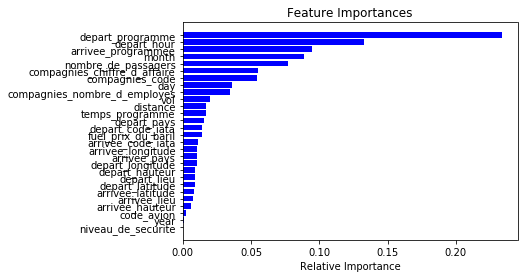

In [296]:
import matplotlib.pyplot as plt

features=X.columns
importances = model.feature_importances_
indices = np.argsort(importances)

plt.figure(1)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')